In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def extract_path(path):
    base = os.path.basename(path)
    return base.split('log_')[1].split('_')[0]

def plot_continual(paths):
    eval_interval = 10

    maxes = {
        'Hopper-v5': pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max(),
        'Swimmer-v5': pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max(),
        'Walker2d-v5': pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max()
    }


    task_names = [extract_path(path) for path in paths]
    tasks = [pd.read_csv(path) for path in paths]


    tasks[0] = tasks[0][:1000]          # eventually fix retraining

    training_rewards = pd.concat([task['avg_reward'] for task in tasks], axis=1)
    first_task_eval = pd.concat([task[f'{task_names[0]}_avg_reward'] for task in tasks[1:]], axis=1)
    second_task_eval = pd.concat([task[f'{task_names[1]}_avg_reward'] for task in tasks[2:]], axis=1)
    training_rewards.columns = task_names
    max_rewards = pd.Series({name: maxes[name] for name in task_names})
    normalized_rewards = training_rewards.divide(max_rewards)

    rewards = pd.concat([normalized_rewards[task] for task in task_names])


    cut1 = len(normalized_rewards[task_names[0]])
    cut2 = cut1 + len(normalized_rewards[task_names[1]])

    eval_task1_x1 = [cut1 + i * eval_interval for i in range(first_task_eval.iloc[:, 0].count())]
    eval_task1_y1 = first_task_eval.iloc[:, 0].dropna().values / max_rewards[task_names[0]]
    eval_task1_x2 = [cut2 + i * eval_interval for i in range(first_task_eval.iloc[:, 1].count())]
    eval_task1_y2 = first_task_eval.iloc[:, 1].dropna().values / max_rewards[task_names[0]]

    eval_task2_x1 = [cut2 + i * eval_interval for i in range(second_task_eval.iloc[:, 0].count())]
    eval_task2_y1 = second_task_eval.iloc[:, 0].dropna().values / max_rewards[task_names[1]]


    plt.figure(figsize=(10, 5))

    plt.plot(range(0, cut1), rewards[0:cut1], label=task_names[0])
    plt.plot(range(cut1, cut2), rewards[cut1:cut2], label=task_names[1])
    plt.plot(range(cut2, rewards.shape[0]), rewards[cut2:], label=task_names[2])

    first_task_color = plt.gca().lines[0].get_color()
    plt.plot(eval_task1_x1, eval_task1_y1, linestyle='-', color=first_task_color)
    plt.plot(eval_task1_x2, eval_task1_y2, linestyle='-', color=first_task_color)

    second_task_color = plt.gca().lines[1].get_color()
    plt.plot(eval_task2_x1, eval_task2_y1, linestyle='-', color=second_task_color)

    plt.axvline(x=cut1, color='black', linestyle='--')
    plt.axvline(x=cut2, color='black', linestyle='--')
    plt.xlabel('Iteration')
    plt.ylabel('Normalized avg_reward')
    plt.title('Continual Learning Training Performance')
    plt.legend()
    plt.tight_layout()
    plt.show()


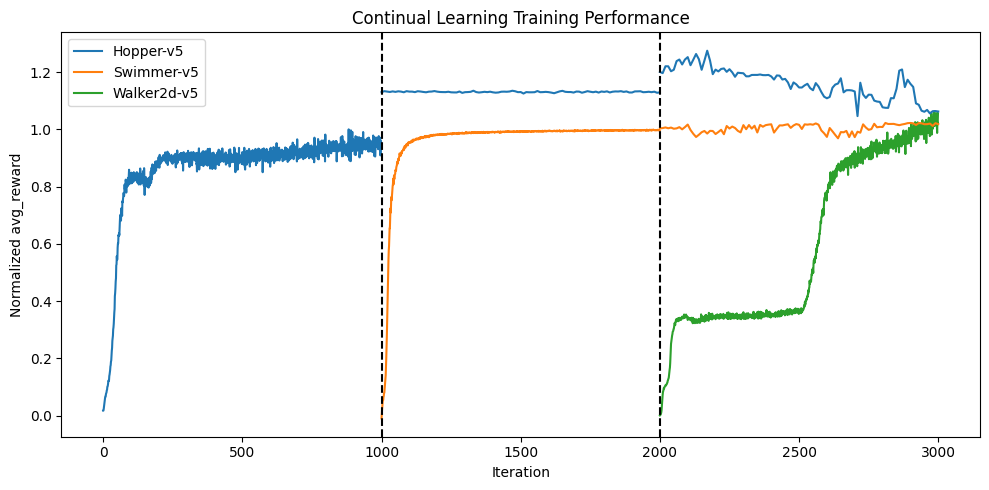

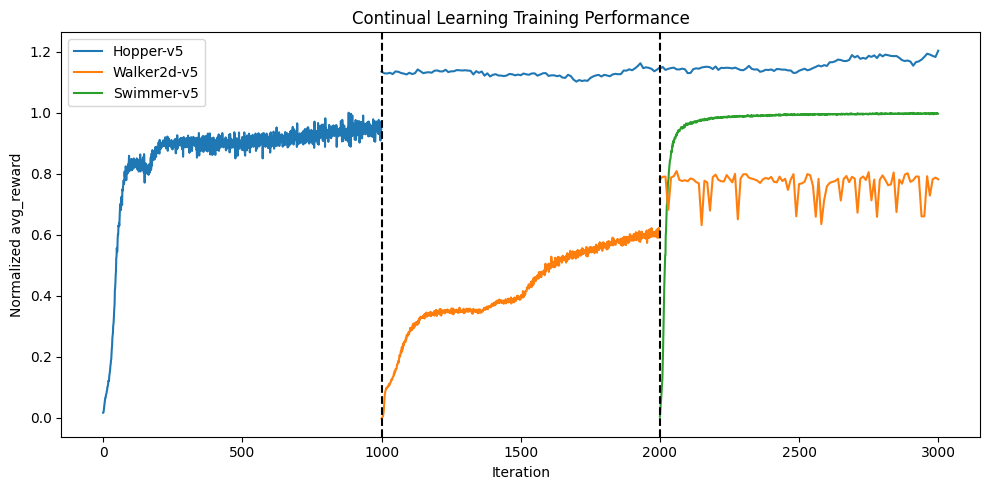

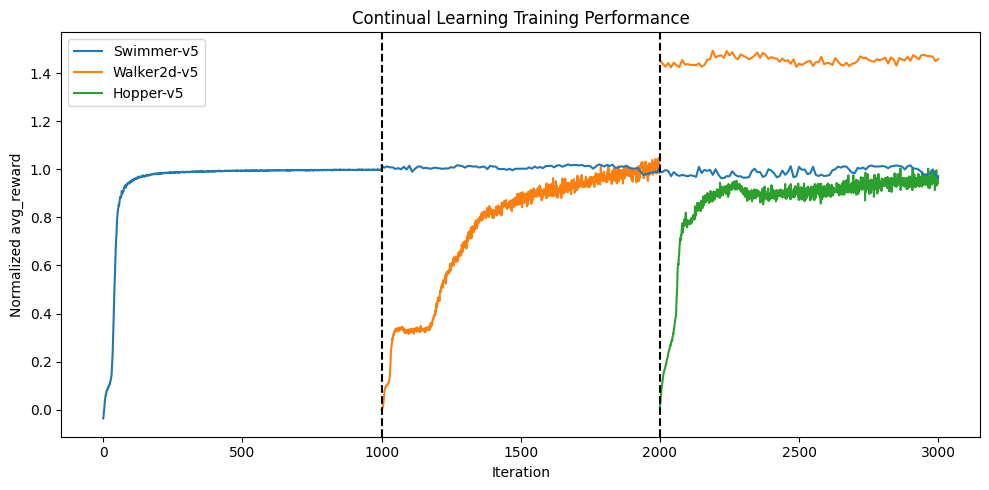

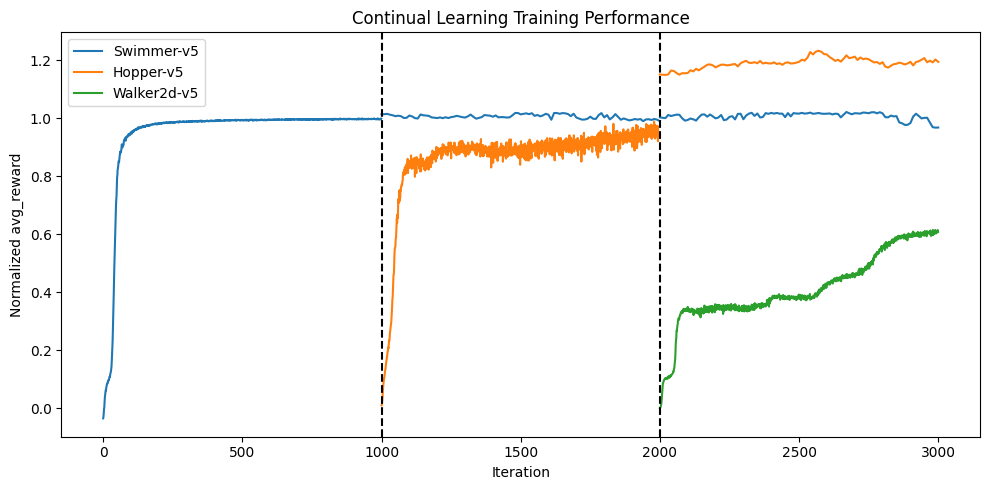

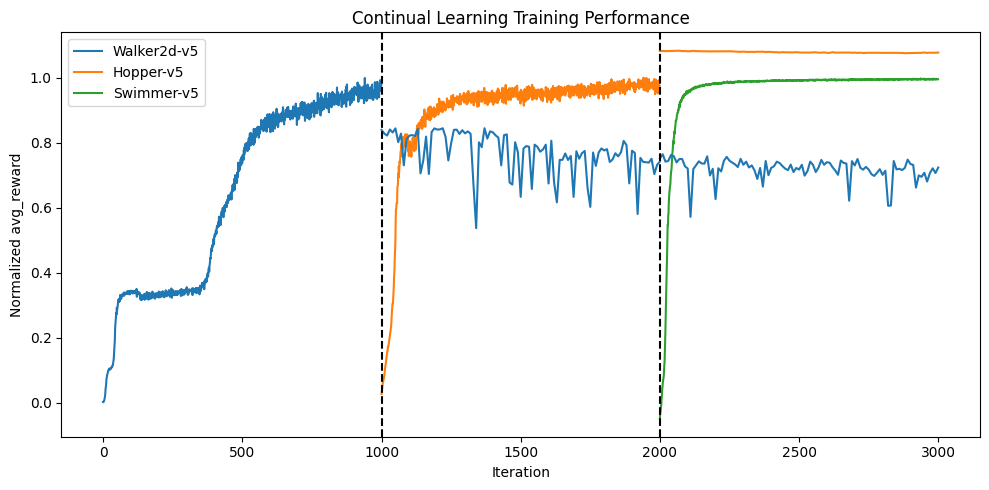

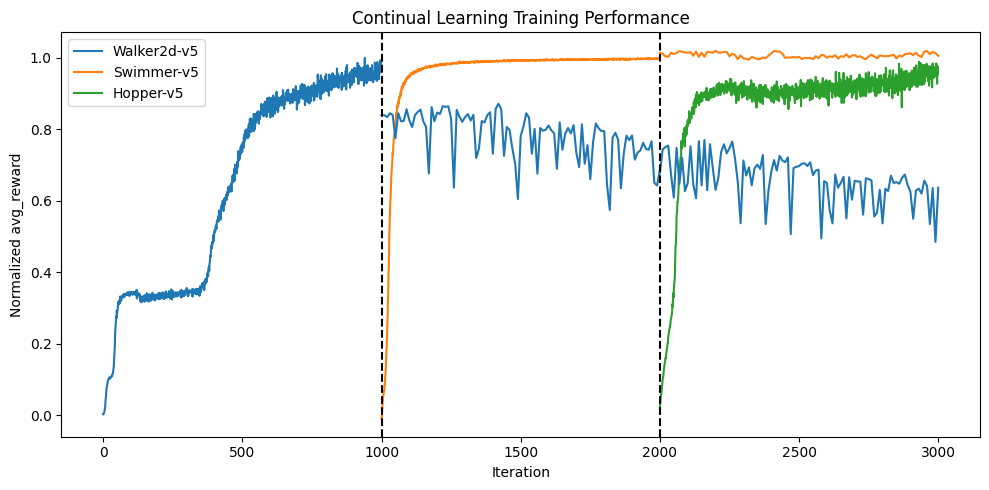

In [ ]:
all_paths = [
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cHopper-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cHopper-v5_Swimmer-v5.csv'],
    [
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cHopper-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cHopper-v5_Walker2d-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cSwimmer-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cSwimmer-v5_Walker2d-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cSwimmer-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cSwimmer-v5_Hopper-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cWalker2d-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cWalker2d-v5_Hopper-v5.csv'
    ],
    [
        '/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
        '/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cWalker2d-v5.csv',
        '/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cWalker2d-v5_Swimmer-v5.csv'
    ]
]

for paths in all_paths:
    plot_continual(paths)

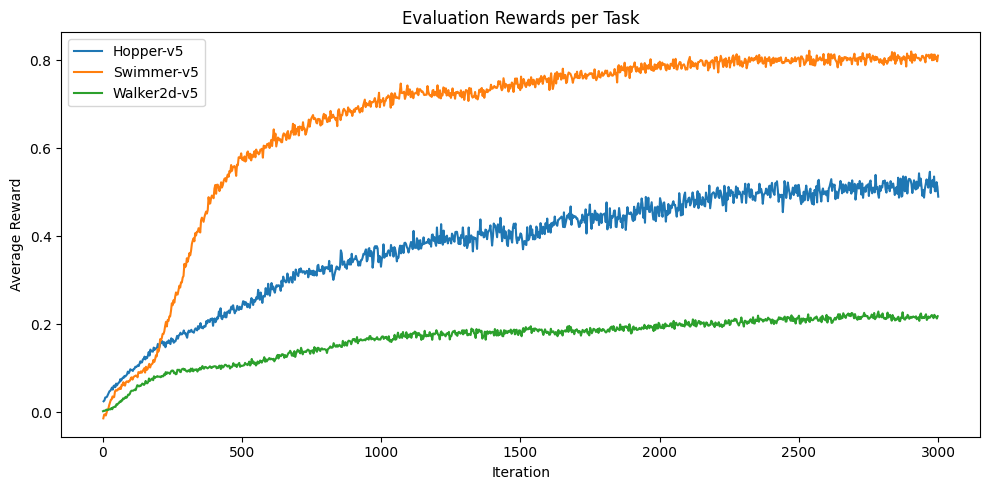

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
df = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_Swimmer-v5_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsFalse_daFalse_cNone.csv")
hopper_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max()
swimmer_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max()
walker_max_rew = pd.read_csv("/home/n.pitzalis/es/logs/csv/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv")[:1000]['avg_reward'].max()

max_rews = {
    "Hopper-v5": hopper_max_rew,
    "Swimmer-v5": swimmer_max_rew,
    "Walker2d-v5": walker_max_rew
}

# Normalize rewards
df["normalized_reward"] = df.apply(lambda row: row["avg_reward"] / max_rews[row["env"]], axis=1)


plt.figure(figsize=(10, 5))
# Group by task and plot on same axes
for env, group in df.groupby("env"):
    plt.plot(group["iteration"], group["normalized_reward"], label=env)


# Formatting
plt.xlabel("Iteration")
plt.ylabel("Average Reward")
plt.title("Evaluation Rewards per Task")
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
single_tasks = [
    '/home/n.pitzalis/es/logs/csv/solid/log_Hopper-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
    '/home/n.pitzalis/es/logs/csv/solid/log_Swimmer-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv',
    '/home/n.pitzalis/es/logs/csv/solid/log_Walker2d-v5_s0.1_a0.05_n12_b32_w0.0_centered_amsTrue_daFalse_cNone.csv'
]

def plot_task(path):
    task_name = extract_path(path)
    df = pd.read_csv(path)
    max_rew = df['avg_reward'].max()
    df['normalized_reward'] = df['avg_reward'] / max_rew

    plt.figure(figsize=(10, 5))
    plt.plot(df['iteration'], df['normalized_reward'], label=task_name)
    plt.xlabel('Iteration')
    plt.ylabel('Normalized Average Reward')
    plt.title(f'{task_name} Training Performance')
    plt.legend()
    plt.tight_layout()
    plt.show()


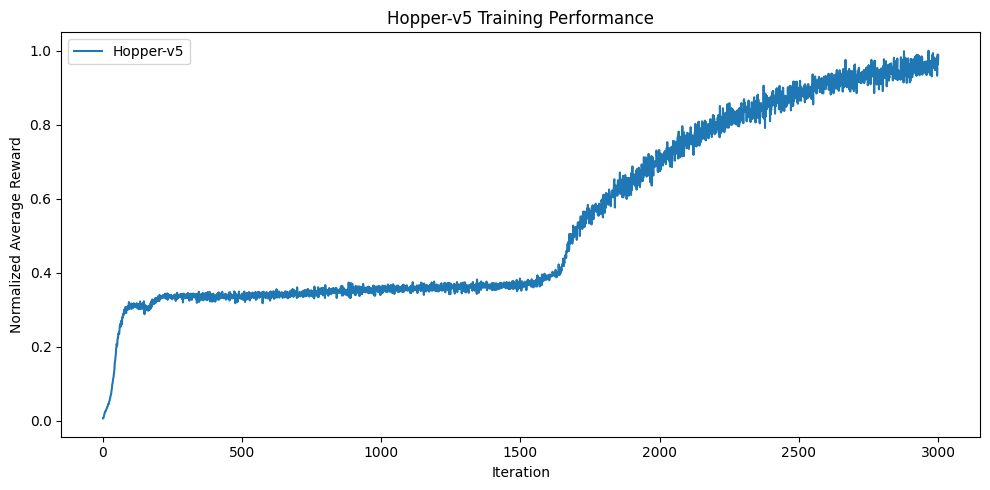

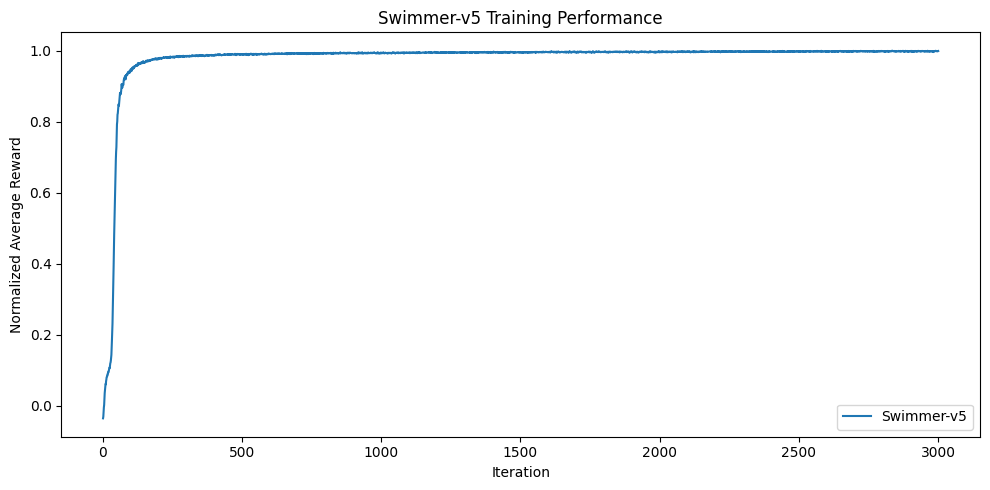

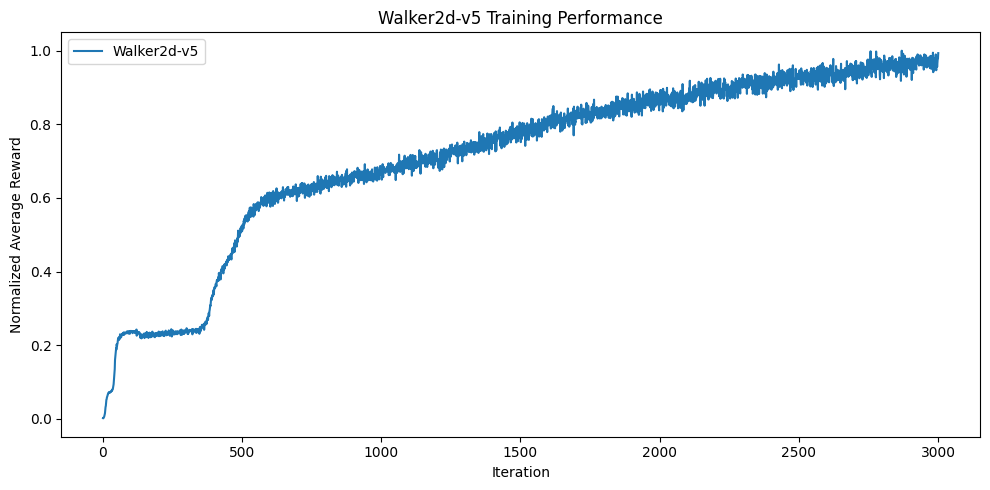

In [9]:
for task in single_tasks:
    plot_task(task)